<a href="https://colab.research.google.com/github/JRiveraB23/SyS05/blob/main/Copia_de_Copia_de_Taller_3_Te%C3%B3rico_Pr%C3%A1ctico_Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title FUNCIONES Y LIBRERÍAS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy
import sympy as sym
import ipywidgets

from scipy import signal
from IPython.display import Markdown as md
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from sympy import DiracDelta, S
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
from numpy import sin, sqrt, cos
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML
import warnings
sym.init_printing()

##***Nota:***
Todos los procedimientos matemáticos se realizaron en el siguiente PDF. Si no hay ningún procedimiento en algún punto, es porque este se encuentra en el [PDF](https://drive.google.com/file/d/1hbKgUaa98ALVggplKjmNXAda1FgOc7WV/view?usp=sharing).

# *Transformada de Laplace y análisisde sistemas lineales e invariantes con el tiempo*

**1.**Consultar y realizar los ejercicios del cuaderno *Definición transformada de Laplace*.

Obtenga $X(s)$ junto con su ROC de la siguiente gráfica de polos y ceros.

![Ilustración de los polos y ceros en un gráfico de polos y ceros](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/pz_plot.png?raw=1)

**2** Consultar y realizar los ejercicios del cuaderno *Propiedades básicas transformada de Laplace*.

Determinar los polos y ceros de la transforma de Laplace $L\{ϵ*sin(\omega_o t)\} $ mediante el cálculo manual y extendido el ejemplo anterior.
¿Qué simetría muestran los polos y los ceros en el plano s?



**3** Demuestre las siguiente propiedades (sin utilizar tablas de propiedades).

**4** Encuentre la transformada de Laplace, dibuje el esquime de polos y ceros y la región de convergencia (ROC).


**5.** Consultar y realizar los ejercicios del cuaderno de la Transformada inversa de Laplace.

**6.** Consultar y realizar los ejercicios del cuaderno Autofunciones y SLITS.

**Ejercicio**

* ¿Qué relación tiene $\lambda$ con el la salida obtenida al resolver la EDO?

> ***R/*** En el cuaderno se planteó que $x(t)=e^{st}$ y $y(t)=\lambda\cdot e^{st}$. Y se reemplaza en la ecuación

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}}
$$

Entonces quedaría

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}
$$

Agrupando términos comunos daría

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2})
$$

Luego, se despeja $\lambda$ y quedaría

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}}
$$

Como se puede evidenciar, para la salida $y(t)$ planteada en el cuaderno, $\lambda$ dio lo mismo, pero multiplicándolo por $e^st$.

* ¿Puede generalizar sus resultados a una EDO de orden arbitrario?

> ***R/*** Sí, esta expresión se puede generalizar a

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}} + \ldots + a_m\frac{d^{m}y(t)}{dt^m}
$$

Entonces quedaría

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}+ \ldots + a_m\lambda s^m e^{st}
$$

Agrupando términos comunos daría

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2}+\ldots + a_ms^m)
$$

Luego, se despeja $\lambda$ y quedaría

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}+\ldots+a_{m} \lambda s^{m}}
$$


**7** Encuentre la función de transferencia en lazo abierto para un circuito RLC SERIE (entrada tensión de alimentación- sálida tensión del capacitor) y un circuito RCL EN PARLELO (entrada corriente de alimentación - salida corriente en el inductor). NOTA: Tenga en cuenta las condiciones iniciales del sistema según lo explicado en el material de apoyo Circuito RLC y Análisis de redes eléctricas.

**8.** Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresión de la salida en el tiempo para una configuración en lazo cerrado del sistema, en función de R,L,C para las siguientes entradas: 1) impulso, 2) Escalón unitario 3) Rampa.

Compruebe los resultados en simulación sobre python (utilizando sympy) y gráfique la señal de salida para cada caso.

## i) Impulso

Condiciones iniciales cero

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t) # entrada impulso que en laplace es 1
y = y.simplify()
y

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

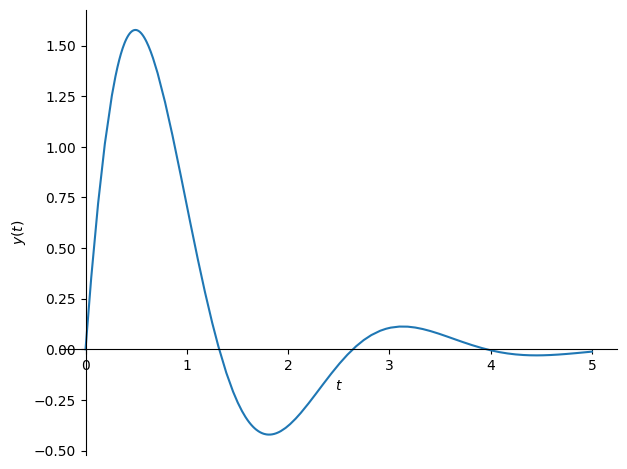

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

        -t    ⎛√51⋅t⎞
20⋅√51⋅ℯ  ⋅sin⎜─────⎟
              ⎝  3  ⎠
─────────────────────
          51         

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

       -t    ⎛√51⋅t⎞                 
7⋅√51⋅ℯ  ⋅sin⎜─────⎟                 
             ⎝  3  ⎠    -t    ⎛√51⋅t⎞
──────────────────── - ℯ  ⋅cos⎜─────⎟
         51                   ⎝  3  ⎠

In [ ]:
y = yext + yint
y.simplify()

⎛         ⎛√51⋅t⎞             ⎞    
⎜9⋅√51⋅sin⎜─────⎟             ⎟    
⎜         ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜──────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝       17             ⎝  3  ⎠⎠    

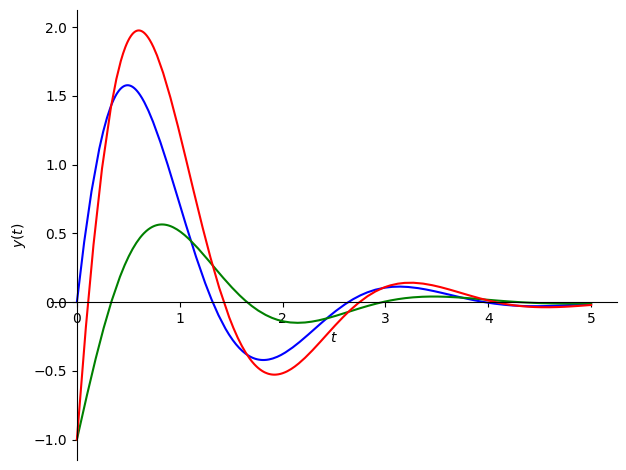

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

## ii) Escalón unitario

Condiciones iniciales cero

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t) # entrada escalón unitario en laplace es 1/s
y = y.simplify()
y

⎛            ⎛√51⋅t⎞             ⎞    
⎜     √51⋅sin⎜─────⎟             ⎟    
⎜ t          ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜ℯ  - ────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝           17            ⎝  3  ⎠⎠    

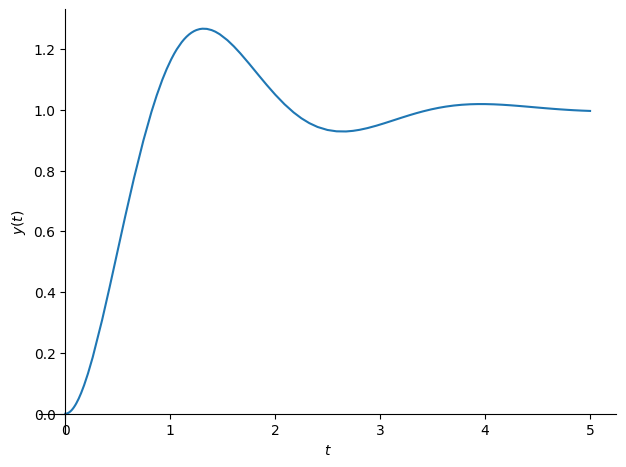

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

⎛            ⎛√51⋅t⎞             ⎞    
⎜     √51⋅sin⎜─────⎟             ⎟    
⎜ t          ⎝  3  ⎠      ⎛√51⋅t⎞⎟  -t
⎜ℯ  - ────────────── - cos⎜─────⎟⎟⋅ℯ  
⎝           17            ⎝  3  ⎠⎠    

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 2).subs(y0, 3), s, t)
yint

        -t    ⎛√51⋅t⎞                   
29⋅√51⋅ℯ  ⋅sin⎜─────⎟                   
              ⎝  3  ⎠      -t    ⎛√51⋅t⎞
───────────────────── + 3⋅ℯ  ⋅cos⎜─────⎟
          51                     ⎝  3  ⎠

In [ ]:
y = yext + yint
y.simplify()

⎛               ⎛√51⋅t⎞               ⎞    
⎜     26⋅√51⋅sin⎜─────⎟               ⎟    
⎜ t             ⎝  3  ⎠        ⎛√51⋅t⎞⎟  -t
⎜ℯ  + ───────────────── + 2⋅cos⎜─────⎟⎟⋅ℯ  
⎝             51               ⎝  3  ⎠⎠    

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja)

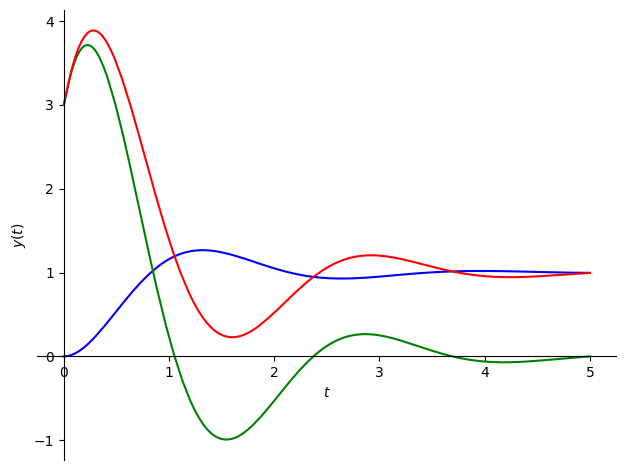

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

## iii) Rampa

Condiciones iniciales cero

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:2 , L: sym.Rational('.8'), C: sym.Rational('.8')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s**2), s, t) # entrada rampa en lapalce 1/s**2
y = y.simplify()

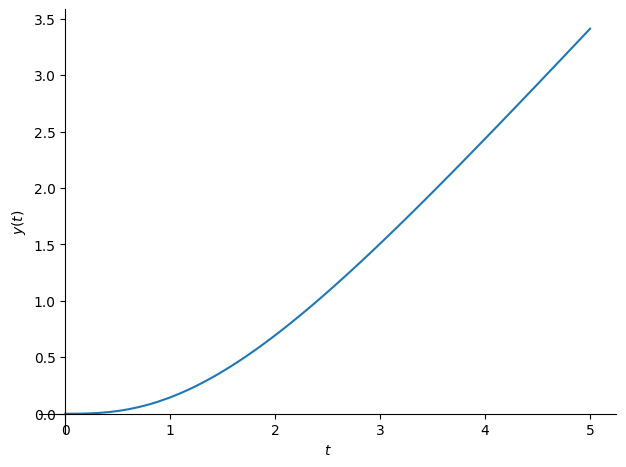

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

                      -5⋅t 
       -5⋅t           ─────
       ─────            4  
         4     8   8⋅ℯ     
t + t⋅ℯ      - ─ + ────────
               5      5    

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, -1).subs(y0, 4), s, t)
yint

      -5⋅t            
      ─────      -5⋅t 
        4        ─────
15⋅t⋅ℯ             4  
─────────── + 4⋅ℯ     
     4                

In [ ]:
y = yext + yint
y.simplify()

⎛                    5⋅t      ⎞  -5⋅t 
⎜                    ───      ⎟  ─────
⎜                     4       ⎟    4  
⎝95⋅t + 4⋅(5⋅t - 8)⋅ℯ    + 112⎠⋅ℯ     
──────────────────────────────────────
                  20                  

En la siguiente gráfica se presentan: la parte interna $y_\text{int}(t)$ (Línea verde), la parte externa $y_\text{ext}(t)$ (Línea azul), y señal de salida $y(t)$ (Línea roja)

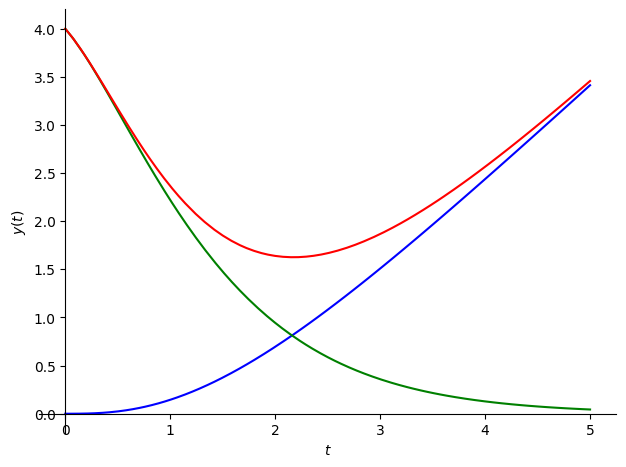

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

**9.** Consulte en que consiste un sistema subamortiguado, sobreamortiguado y de amortiguamiento crítico. Genere una simulación para ejemplificar cada uno de los casos con el sistema en R,L,C serie y paralelo estudiados.



##**Circuito En Serie**

In [ ]:
#@title Ingrese los valores para el circuito RLC en serie.

R=40 #@param {type:"number",min:0}
L=0.1 #@param {type:"number",min:0}
C=5 #@param {type:"number",min:0}

s=sym.symbols('s')

In [ ]:

Wn=1/np.sqrt(L*C)
md=(f'El valor de $\omega_n$ es: {Wn:.2f}')

In [ ]:
K=1
md=(f'El valor de $K$ es: {K:.2f}')

In [ ]:
Xi=(R*C)/(2*np.sqrt(L*C))
md=(f'El valor de $\Xi$ es: {Xi:.2f}')

In [ ]:
Wd=Wn*np.sqrt(1-Xi**2)
md=(f'El valor de $\omega_d$ es: {Wd:.2f}')

<ipython-input-32-512236e1fbc4>:1: RuntimeWarning: invalid value encountered in sqrt
  Wd=Wn*np.sqrt(1-Xi**2)


In [ ]:
if Xi>1:
  print("El sistema es sobreamortiguado")
elif Xi<0:
  print("El sistema es inestable")
elif Xi==1:
  print("El sistema es criticamente amortiguado")
elif Xi==0:
  print("El sistema es oscilador")
else:
  print("El sistema es subamortiguado")

El sistema es sobreamortiguado


In [ ]:
num=[0, 0, Wn**2]
den=[1, 2*Wn*Xi, Wn**2]

Hs=signal.TransferFunction(num,den)

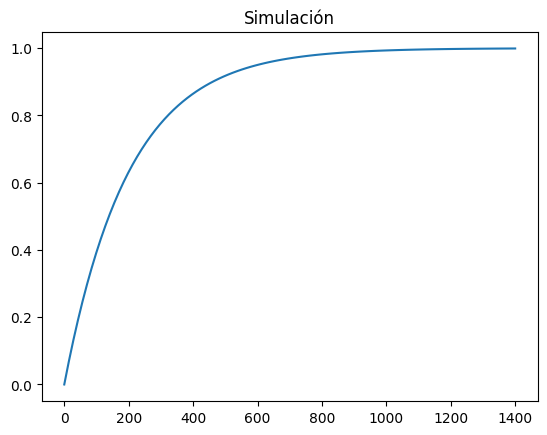

In [ ]:
time, response=signal.step(Hs)

plt.plot(time,response)
plt.title("Simulación")
plt.show()

##**Circuito En Paralelo**

In [ ]:
#@title Ingrese los valores para el circuito RLC en serie.

R=0.01 #@param {type:"number",min:0}
L=0.1 #@param {type:"number",min:0}
C=250 #@param {type:"number",min:0}

s=sym.symbols('s')

In [ ]:
Wnp=1/np.sqrt(L*C)
md=(f'El valor de $\omega_n$ es: {Wnp:.2f}')

In [ ]:
Kp=1/R
md=(f'El valor de $K$ es: {Kp:.2f}')

In [ ]:
Xip=np.sqrt(L*C)/(2*R*C)
md=(f'El valor de $\Xi$ es: {Xip:.2f}')

In [ ]:
Wdp=Wnp*np.sqrt(1-Xip**2)
md=(f'El valor de $\omega_d$ es: {Wdp:.2f}')

In [ ]:
if Xip>1:
  print("El sistema es sobreamortiguado")
elif Xip<0:
  print("El sistema es inestable")
elif Xip==1:
  print("El sistema es criticamente amortiguado")
elif Xip==0:
  print("El sistema es oscilador")
else:
  print("El sistema es subamortiguado")

El sistema es criticamente amortiguado


In [ ]:
num=[0, 0, Wnp**2]
den=[1, 2*Wnp*Xip, Wnp**2]

Hs=signal.TransferFunction(num,den)

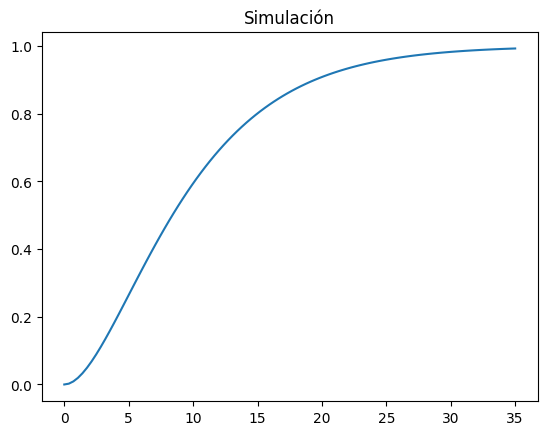

In [ ]:
time, response=signal.step(Hs)

plt.plot(time,response)
plt.title("Simulación")
plt.show()

**10.** Para los sistemas del punto 9, encuentre las expresiones para el factor de amortiguamiento $\xi$, la frecuencia natural no amortiguada $\omega_n$ y la frecuencia natural amortiguada $\omega_d$ en función de R,L,C. Nota: asuma las condiciones iniciales cero.

##Transformada Z y filtros digitales



**1.**
Consulte en que consiste la transformada Z. Explique las semejanzas y diferencias entre la serie de Fourier, transformada de Laplace y la transformada Z.

**2.**
Encuentre la transformada Z para las siguiente señales.

**3.**
Consulte en que consiste el metodo de diseño de filtros FIR por ventaneo(Ver funcion firwin y material de apoyo). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR.


###Filtros de respuesta finita al impulso (FIR)

Los filtros de respuesta finita al impulso, FIR por sus siglas en inglés, son filtros que no tienen realimentación. Gracias a esto, se caracterizan por tener una fase perfectamente lineal y son siempre estables. También, su montaje es muy sencillo. Se rige por la siguiente ecuación:

$$
y[n]=\sum_{k=0}^{N-1}h[k]x[n-k]
$$

Si se le aplicara la transformada Z, quedaría como

$$
H[z]=\sum_{k=0}^{N-1}h[k]z^{-k}
$$

![Ilustración FIR](https://upload.wikimedia.org/wikipedia/commons/3/35/FIR_estr.PNG)

Como se puede ver en la imagen, la $T$ es el retardo y $h(n)$ los coeficientes. Los polos se encuentran en el origen y los ceros se presentan en pares de recíprocos si el filtro se diseña para tener fase lineal. El uso normal de estos filtros se debe a la modificación mediante la atenuación o amplificación de la frecuencia, controlando tonos graves o agudos dependiendo su necesidad.


###Filtros de respuesta infinita al impulso (IIR)}

Los filtros de respuesta infinita al impulso, IIR por sus siglas en inglés, tienen una realimentación, por lo cual dependen de su señales de entrada y salida. Uno de los riesgos con este tipo filtros es que si se diseña de forma incorrecta, pueden llegar a ser inestables. Estos filtros se caracterizan con la siguiente ecuación

$$
y[n]=b_0x[n]+b_1x[n-1]+ \ldots + b_Nx[n-N]-a_1y[n-1]-a_2y[n-2]- \ldots -a_My[n-M]
$$

donde $a$ y $b$ son los coeficientes del filtro. Si se aplica la transformada Z, esta daría

$$
H[z]=\frac{\sum_{k=0}^Nb_kz^{-k}}{1+\sum_{k=1}^M a_kz^{-k}}
$$

![Ilustración IIR](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/IIR-filter.png/220px-IIR-filter.png)

###Paralelo

* Mediante la respuesta en impulso podemos diferenciar mediante el numero de términos, puesto que en un FIR estos son finitos al contrario de un IIR.

* La retroalimentación  es un factor determinante ya que define la estabilidad dependiendo la construcción del circuito, siendo en el FIR menos relevante ya que es carente de esta logrando una estabilidad perfecta.

* Mientras que la fase del FIR es completamente lineal, la del IRR puede ser bidireccional pero nunca lineal.


**4.** Presente una comparación entre las estrategias de diseño mediante invarianza al impulso y transofrmación bilineal

###Invarianza al impulso


*   Se mantiene la respuesta impulsional de ambos filtros
*   La estabilidad se mantiene (Filtros analógicos estables dan lugar a filtros digitales estables).
* La relación entre frecuencias es *lineal* ya que: \\
Analógico:
$s_k=jΩ$ \\
Digital:
$z=e^{s_kT}=e^{jΩT}$  $w=ΩT$ \\
$z=e^{jw}$
$w=ΩT$
* Causa que señales continuas *distintas* se tornen *indistinguibles* cuando se muestrea. Sabemos que en los filtros ideales su respuesta no puede ser cero en una banda por lo que independientemente del valor de $T$, siempre habrá una contribución de $H(Ω)$ que no verificará el teorema de muestreo. Si la frecuencia de muestreo es $𝝮_s= 2πFs$ , todas las frecuencia analógicas por encima de $Ω_s/2$ producirán *aliasing*.
* Para un correcto funcionamiento, el filtro analógico debe verificar $H(Ω)≅0$  $|Ω|>\frac{Ω_s}{2}$.
* Este método no es adecuado para el diseño de filtros pasa-alta ni elimina-banda. Además, si tenemos en cuenta los prototipos analógicos considerados, los filtros de Tchebyshev II y los Elípticos presentarán peor comportamiento debido al rizado en la banda no pasante.

###Transformación bilineal
* La diferencia entre el filtro analógico y el digital decrece a medida que T $\rightarrow$ 0, ya que la aproximación de los trapecios es más exacta.
*  La estabilidad se mantiene (Filtros analógicos estables dan lugar a filtros digitales estables).La relación entre frrecuencias asegura que si $Ω_1<Ω_2 \rightarrow ω_1<ω_2$, es decir, un pasa-baja analógico dará lugar a un pasa-baja digital, así con todo el resto de filtros.
* La relación entre las frecuencias analógica y digitales es *no lineal* y viene dada por:
\begin{align*}
ω=2.Tan^{-1}\left(\frac{T𝛀}{2}\right)          &   &Ω=\frac{2}{T}.Tan\left( \frac{ω}{2} \right)\\
\end{align*}
Donde:
$ω=2π\frac{F}{F_s}$ \\
Es decir, se lleva a cabo una compresión de las frecuencias analógicas. Este proceso de “Deformación” es lo que se denomina *warping*.

**5.** Realizar los ejercicio propuestos en el cuaderno Filtros digitales y transformada Z.

1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.

> **R/** El punto 5.1 y 5.3 se encuentran en el siguiente [colab](https://colab.research.google.com/drive/1FUuFctRcHi4Fz7u1TOZJ15Gntf8KnPLk?usp=sharing)

2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://ccrma.stanford.edu/~jos/sasp/Window_Method_FIR_Filter.html#:~:text=The%20window%20method%20for%20digital,and%20windows%20for%20spectrum%20analysis)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR.

**R/** Filtros FIR

Ventajas:
- Su respuesta al impulso es fácil de obtener a través del vector de coeficientes.
- Su respuesta en frecuencia es fácil de analizar a través de la transformada de Fourier.
- Son fáciles de diseñar definiendo su respuesta en frecuencia y usando la transformada inversa.

Desventajas:

- Es necesario un gran número de coeficientes para conseguir las mismas prestaciones que daría un filtro IIR de orden mucho menor.
- Para conseguir una buena resolución a bajas frecuencias se requieren muchos coeficientes.
- Al necesitar más coeficientes, tiene un retardo grande. A veces no aptos para directos.

Filtros IIR

Ventajas:
- Requieren menos coeficientes para hacer operaciones similares de filtrado.
- Se ejecutan más rápido y no requieren de memoria externa.

Desventajas:

- La respuesta de la fase no es lineal.
- La naturaleza recursiva de estos filtros hace que sean más difíciles de diseñar e implementar.

3. Incluya la implementación del filtro `firwin` en el punto 1.